In [1]:
# 📚 Basic Libraries
import numpy as np 
import pandas as pd
import warnings

# 📊 Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# 🤖 Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import roc_curve, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [2]:
# ⚙️ Settings
pd.set_option('display.max_columns', None) # display all columns
warnings.filterwarnings('ignore') # ignore warnings

In [3]:
patients = pd.read_csv('patients.csv')
patients.head(10)

,subject_id,hadm_id,anchor_age,anchor_year,indate,diff,age,outdate,dod,deceased
0,15894414,25580006,46,2110,2111-02-28,1,47,2111-02-28,2111-02-28,1
1,15894414,28814954,46,2110,2110-10-29,0,46,2110-10-31,NaN,0
2,15894414,21885520,46,2110,2110-12-02,0,46,2110-12-08,NaN,0
3,10780631,23352244,55,2110,2111-01-01,1,56,2111-01-03,2111-01-03,1
4,12859052,26616069,62,2110,2110-10-27,0,62,2110-10-29,NaN,0
5,14878942,25816015,68,2110,2111-03-06,1,69,2111-03-09,2111-03-09,1
6,14756995,28143436,71,2110,2110-05-09,0,71,2110-05-17,NaN,0
7,15792737,28006295,73,2110,2110-11-16,0,73,2110-11-29,NaN,0
8,16184287,27522382,82,2110,2111-02-14,1,83,2111-02-16,NaN,0
9,16184287,24240915,82,2110,2111-01-18,1,83,2111-01-21,NaN,0


In [4]:
patients.subject_id.nunique()

784

In [5]:
patients.hadm_id.nunique()

998

In [6]:
patients[['subject_id', 'hadm_id', 'indate']].groupby(['subject_id', 'hadm_id', 'indate']).nunique()

Empty DataFrame
Columns: []
Index: [(10003019, 22774359, 2175-10-08), (10020944, 29974575, 2131-02-27), (10049746, 24332085, 2136-11-26), (10073847, 22194617, 2136-01-15), (10073847, 22194617, 2136-02-08), (10074474, 26500750, 2165-11-02), (10104732, 25159676, 2184-08-06), (10107664, 25136353, 2161-12-24), (10125241, 25625835, 2161-10-17), (10127132, 28554377, 2164-11-28), (10132136, 29646136, 2160-01-31), (10143030, 27543597, 2180-05-10), (10143030, 27543597, 2180-06-20), (10146603, 23552174, 2199-01-14), (10148417, 29867930, 2197-10-13), (10155871, 25868401, 2153-03-29), (10177348, 21976241, 2179-11-13), (10191971, 22556333, 2133-11-29), (10191971, 22556333, 2133-12-05), (10191971, 23712192, 2133-11-11), (10191971, 29690819, 2133-09-28), (10192748, 21713055, 2139-09-30), (10192748, 23481781, 2140-01-11), (10192748, 28902887, 2140-03-22), (10199399, 21141175, 2161-04-04), (10225882, 24656116, 2178-01-06), (10225882, 24656116, 2178-01-10), (10225882, 28998553, 2178-01-23), (10236942, 21834040, 2127-03-08), (10261771, 22432336, 2168-03-26), (10268311, 23042403, 2184-04-14), (10276690, 24898739, 2191-08-19), (10354409, 23255977, 2134-05-17), (10359443, 24308293, 2140-01-24), (10363123, 25944569, 2118-08-06), (10368327, 23928699, 2151-06-27), (10388041, 26250014, 2117-03-04), (10428217, 21917550, 2152-02-16), (10428217, 28879895, 2152-03-10), (10428217, 28879895, 2152-04-05), (10447634, 20212982, 2164-08-03), (10447634, 20212982, 2164-08-14), (10456768, 27361807, 2110-03-21), (10456768, 27361807, 2110-03-22), (10468324, 22796682, 2129-10-18), (10476869, 27588152, 2139-01-27), (10502783, 24547902, 2186-03-04), (10503209, 20515236, 2154-03-06), (10516278, 23951090, 2165-07-13), (10516278, 23951090, 2165-07-25), (10516278, 26591083, 2165-03-07), (10516278, 29450840, 2164-12-08), (10516278, 29450840, 2164-12-13), (10533554, 20192903, 2181-07-04), (10533554, 20192903, 2181-07-10), (10533554, 20192903, 2181-07-15), (10533554, 23201547, 2177-01-31), (10533554, 25373398, 2177-12-07), (10535061, 27087987, 2171-09-23), (10560480, 26358316, 2147-05-21), (10564151, 27860849, 2162-09-03), (10564151, 27860849, 2162-09-07), (10564151, 27860849, 2162-09-14), (10572204, 21766867, 2129-08-16), (10572718, 23686931, 2125-02-04), (10572718, 27314538, 2120-02-20), (10588464, 27958936, 2113-02-15), (10594674, 21715181, 2203-08-17), (10594674, 21715181, 2203-08-22), (10635441, 27536393, 2117-03-27), (10636023, 25910991, 2116-11-11), (10636690, 23060726, 2179-10-26), (10648897, 22742127, 2156-03-24), (10684803, 21808573, 2132-05-30), (10685213, 27410279, 2162-01-16), (10685213, 27410279, 2162-01-24), (10685213, 27410279, 2162-01-28), (10695410, 22535104, 2179-03-29), (10722378, 25658776, 2119-02-24), (10729759, 21158396, 2134-08-22), (10765488, 25839711, 2198-08-09), (10780631, 23352244, 2111-01-01), (10785290, 24043082, 2175-04-28), (10791772, 26096086, 2112-07-08), (10792661, 26360527, 2196-08-21), (10792661, 26360527, 2196-08-26), (10792661, 26360527, 2196-09-06), (10792661, 26360527, 2196-09-25), (10793703, 20665592, 2175-12-09), (10795507, 25606775, 2196-12-30), (10826901, 24381601, 2135-05-04), (10827567, 28397885, 2156-07-12), (10827578, 20980039, 2130-05-04), (10827578, 25179666, 2130-07-11), (10830719, 21446336, 2182-09-18), (10830719, 22085438, 2182-10-14), (10860467, 22379588, 2154-04-23), (10865504, 20772091, 2178-12-08), (10865504, 20772091, 2179-02-12), (10873456, 29916398, 2133-05-06), ...]

[1170 rows x 0 columns]

In [96]:
patients.deceased.value_counts()

deceased
0    1059
1     115
Name: count, dtype: int64

In [7]:
weight = pd.read_csv('weight.csv')
weight.head(10)

,hadm_id,intime,subject_id,chartdate,seq_num,result_name,result_value
0,28573817,2116-10-12T21:48:10,12878814,2116-10-02,3,BMI (kg/m2),23.6
1,23661636,2142-09-06T16:43:32,17496927,2142-09-06,3,BMI (kg/m2),22.3
2,22774359,2175-10-08T18:58:00,10003019,2175-09-25,1,BMI (kg/m2),24.2
3,22774359,2175-10-08T18:58:00,10003019,2175-09-29,1,BMI (kg/m2),24.7
4,22774359,2175-10-08T18:58:00,10003019,2175-10-02,1,BMI (kg/m2),25.0
5,22774359,2175-10-08T18:58:00,10003019,2175-10-06,1,BMI (kg/m2),24.0
6,24332085,2136-11-26T04:43:28,10049746,2136-11-24,1,BMI (kg/m2),25.8
7,25136353,2161-12-24T00:18:08,10107664,2161-12-12,1,BMI (kg/m2),24.1
8,25136353,2161-12-24T00:18:08,10107664,2161-12-14,1,BMI (kg/m2),24.3
9,25136353,2161-12-24T00:18:08,10107664,2161-12-18,1,BMI (kg/m2),23.6


In [8]:
labs = pd.read_csv('labs.csv')
labs.head(10)

,itemid,label,fluid,category,labevent_id,subject_id,hadm_id,specimen_id,itemid_1,order_provider_id,charttime,storetime,value,valuenum,valueuom,ref_range_lower,ref_range_upper,flag,priority,comments
0,51221,Hematocrit,Blood,Hematology,571732,10049746,24332085,51879382,51221,NaN,2136-11-26 16:59:00,2136-11-26 17:41:00,19.0,19.0,%,34.0,45.0,abnormal,STAT,NaN
1,51221,Hematocrit,Blood,Hematology,7241415,10636023,25910991,20169900,51221,NaN,2116-11-11 12:17:00,2116-11-11 12:45:00,22.4,22.4,%,34.0,45.0,abnormal,ROUTINE,NaN
2,51221,Hematocrit,Blood,Hematology,7241450,10636023,25910991,49026583,51221,NaN,2116-11-11 23:08:00,2116-11-12 00:32:00,25.8,25.8,%,34.0,45.0,abnormal,STAT,NaN
3,51221,Hematocrit,Blood,Hematology,35510919,13021959,23627730,96457402,51221,NaN,2145-02-24 23:37:00,2145-02-25 00:15:00,40.6,40.6,%,34.0,45.0,NaN,ROUTINE,NaN
4,51221,Hematocrit,Blood,Hematology,81291364,16880700,26855218,91333819,51221,NaN,2115-07-09 00:00:00,2115-07-09 00:35:00,35.8,35.8,%,34.0,45.0,NaN,STAT,NaN
5,51221,Hematocrit,Blood,Hematology,81291364,16880700,26855218,91333819,51221,NaN,2115-07-09 00:00:00,2115-07-09 00:35:00,35.8,35.8,%,34.0,45.0,NaN,STAT,NaN
6,51221,Hematocrit,Blood,Hematology,93350334,17894020,21210446,33613757,51221,NaN,2132-05-24 08:22:00,2132-05-24 09:00:00,32.2,32.2,%,34.0,45.0,abnormal,ROUTINE,NaN
7,51221,Hematocrit,Blood,Hematology,110792070,19375263,23601974,20953732,51221,NaN,2122-06-29 05:58:00,2122-06-29 06:40:00,33.1,33.1,%,34.0,45.0,abnormal,ROUTINE,NaN
8,51221,Hematocrit,Blood,Hematology,11160362,10965508,25628205,95458827,51221,NaN,2170-03-30 11:09:00,2170-03-30 11:50:00,22.9,22.9,%,36.0,48.0,abnormal,STAT,NaN
9,51221,Hematocrit,Blood,Hematology,20656479,11766969,25017062,28702751,51221,NaN,2133-01-30 05:35:00,2133-01-30 06:01:00,29.3,29.3,%,36.0,48.0,abnormal,ROUTINE,NaN


In [9]:
chartevents = pd.read_csv('chartevents.csv')
chartevents.head(10)

,subject_id,hadm_id,stay_id,caregiver_id,charttime,storetime,itemid,value,valuenum,valueuom,warning,itemid_1,label,abbreviation,linksto,category,unitname,param_type,lownormalvalue,highnormalvalue
0,18617771,22474750,32776221,15527,2133-06-14 22:00:00,2133-06-14 22:07:00,220210,16,16,insp/min,0,220210,Respiratory Rate,RR,chartevents,Respiratory,insp/min,Numeric,NaN,NaN
1,18617771,22474750,32776221,15527,2133-06-14 22:00:00,2133-06-14 22:07:00,220210,16,16,insp/min,0,220210,Respiratory Rate,RR,chartevents,Respiratory,insp/min,Numeric,NaN,NaN
2,18483564,20628338,33065790,90865,2130-01-21 18:00:00,2130-01-21 18:19:00,220210,25,25,insp/min,0,220210,Respiratory Rate,RR,chartevents,Respiratory,insp/min,Numeric,NaN,NaN
3,18570563,22404794,37499441,27115,2133-02-19 10:00:00,2133-02-19 10:19:00,220210,25,25,insp/min,0,220210,Respiratory Rate,RR,chartevents,Respiratory,insp/min,Numeric,NaN,NaN
4,15987325,22810413,35748575,73391,2139-03-17 00:00:00,2139-03-17 00:51:00,220210,14,14,insp/min,0,220210,Respiratory Rate,RR,chartevents,Respiratory,insp/min,Numeric,NaN,NaN
5,19356461,20108741,31143630,13620,2122-09-04 17:00:00,2122-09-04 18:53:00,220210,17,17,insp/min,0,220210,Respiratory Rate,RR,chartevents,Respiratory,insp/min,Numeric,NaN,NaN
6,17819993,25953884,37352900,40044,2195-05-16 13:00:00,2195-05-16 14:30:00,220210,16,16,insp/min,0,220210,Respiratory Rate,RR,chartevents,Respiratory,insp/min,Numeric,NaN,NaN
7,16308412,24317197,30947718,83370,2112-02-16 20:13:00,2112-02-16 20:40:00,220210,24,24,insp/min,0,220210,Respiratory Rate,RR,chartevents,Respiratory,insp/min,Numeric,NaN,NaN
8,13643669,20797382,37583047,59086,2177-02-02 04:00:00,2177-02-02 04:43:00,220210,19,19,insp/min,0,220210,Respiratory Rate,RR,chartevents,Respiratory,insp/min,Numeric,NaN,NaN
9,12040402,28316681,38666813,88156,2146-03-05 06:00:00,2146-03-05 06:06:00,220210,16,16,insp/min,0,220210,Respiratory Rate,RR,chartevents,Respiratory,insp/min,Numeric,NaN,NaN


In [10]:
vasopressors = pd.read_csv('vasopressors.csv')
vasopressors.head(10)

,subject_id,hadm_id,date,f0_
0,12249989,24817845,2180-12-15,0
1,12249989,24817845,2180-12-08,0
2,12249989,24817845,2180-12-01,0
3,14781801,20939269,2115-07-30,0
4,13336663,21753015,2131-01-13,0
5,17440353,24730721,2154-04-10,0
6,16308412,21914062,2112-11-13,0
7,11655233,24740766,2188-03-08,0
8,12231635,20041820,2141-07-15,0
9,12231635,20041820,2141-07-02,0


In [11]:
vasopressors = vasopressors.rename(columns={
    'f0_': 'vp'
})

In [12]:
vasopressors.head(10)

,subject_id,hadm_id,date,vp
0,12249989,24817845,2180-12-15,0
1,12249989,24817845,2180-12-08,0
2,12249989,24817845,2180-12-01,0
3,14781801,20939269,2115-07-30,0
4,13336663,21753015,2131-01-13,0
5,17440353,24730721,2154-04-10,0
6,16308412,21914062,2112-11-13,0
7,11655233,24740766,2188-03-08,0
8,12231635,20041820,2141-07-15,0
9,12231635,20041820,2141-07-02,0


In [13]:
labs_clean = labs[['subject_id','hadm_id', 'charttime','label','valuenum']]
labs_clean.head(10)

,subject_id,hadm_id,charttime,label,valuenum
0,10049746,24332085,2136-11-26 16:59:00,Hematocrit,19.0
1,10636023,25910991,2116-11-11 12:17:00,Hematocrit,22.4
2,10636023,25910991,2116-11-11 23:08:00,Hematocrit,25.8
3,13021959,23627730,2145-02-24 23:37:00,Hematocrit,40.6
4,16880700,26855218,2115-07-09 00:00:00,Hematocrit,35.8
5,16880700,26855218,2115-07-09 00:00:00,Hematocrit,35.8
6,17894020,21210446,2132-05-24 08:22:00,Hematocrit,32.2
7,19375263,23601974,2122-06-29 05:58:00,Hematocrit,33.1
8,10965508,25628205,2170-03-30 11:09:00,Hematocrit,22.9
9,11766969,25017062,2133-01-30 05:35:00,Hematocrit,29.3


In [14]:
labs_clean['date'] = labs_clean['charttime'].str[:10]

In [15]:
labs_clean = labs_clean.drop(columns=['charttime'])

In [16]:
labs_clean.head(10)

,subject_id,hadm_id,label,valuenum,date
0,10049746,24332085,Hematocrit,19.0,2136-11-26
1,10636023,25910991,Hematocrit,22.4,2116-11-11
2,10636023,25910991,Hematocrit,25.8,2116-11-11
3,13021959,23627730,Hematocrit,40.6,2145-02-24
4,16880700,26855218,Hematocrit,35.8,2115-07-09
5,16880700,26855218,Hematocrit,35.8,2115-07-09
6,17894020,21210446,Hematocrit,32.2,2132-05-24
7,19375263,23601974,Hematocrit,33.1,2122-06-29
8,10965508,25628205,Hematocrit,22.9,2170-03-30
9,11766969,25017062,Hematocrit,29.3,2133-01-30


In [17]:
labs_clean = labs_clean.groupby(['subject_id', 'hadm_id', 'date', 'label'])['valuenum'].mean().reset_index()

In [18]:
labs_clean

,subject_id,hadm_id,date,label,valuenum
0,10003019,22774359,2175-10-08,Creatinine,1.1
1,10020944,29974575,2131-02-27,"Bilirubin, Total",0.4
2,10020944,29974575,2131-02-27,Creatinine,1.3
3,10020944,29974575,2131-02-27,Hematocrit,37.4
4,10020944,29974575,2131-02-27,Platelet Count,166.0
...,...,...,...,...,...
3287,19963038,27928511,2160-03-16,Platelet Count,130.0
3288,19994730,28502826,2169-08-29,"Bilirubin, Total",0.5
3289,19994730,28502826,2169-08-29,Creatinine,0.8
3290,19994730,28502826,2169-08-29,Hematocrit,28.4


In [19]:
chart_clean = chartevents[['subject_id','hadm_id', 'charttime','label','valuenum']]
chart_clean.head(10)

,subject_id,hadm_id,charttime,label,valuenum
0,18617771,22474750,2133-06-14 22:00:00,Respiratory Rate,16
1,18617771,22474750,2133-06-14 22:00:00,Respiratory Rate,16
2,18483564,20628338,2130-01-21 18:00:00,Respiratory Rate,25
3,18570563,22404794,2133-02-19 10:00:00,Respiratory Rate,25
4,15987325,22810413,2139-03-17 00:00:00,Respiratory Rate,14
5,19356461,20108741,2122-09-04 17:00:00,Respiratory Rate,17
6,17819993,25953884,2195-05-16 13:00:00,Respiratory Rate,16
7,16308412,24317197,2112-02-16 20:13:00,Respiratory Rate,24
8,13643669,20797382,2177-02-02 04:00:00,Respiratory Rate,19
9,12040402,28316681,2146-03-05 06:00:00,Respiratory Rate,16


In [20]:
chart_clean['date'] = chart_clean['charttime'].str[:10]

In [21]:
chart_clean.head(10)

,subject_id,hadm_id,charttime,label,valuenum,date
0,18617771,22474750,2133-06-14 22:00:00,Respiratory Rate,16,2133-06-14
1,18617771,22474750,2133-06-14 22:00:00,Respiratory Rate,16,2133-06-14
2,18483564,20628338,2130-01-21 18:00:00,Respiratory Rate,25,2130-01-21
3,18570563,22404794,2133-02-19 10:00:00,Respiratory Rate,25,2133-02-19
4,15987325,22810413,2139-03-17 00:00:00,Respiratory Rate,14,2139-03-17
5,19356461,20108741,2122-09-04 17:00:00,Respiratory Rate,17,2122-09-04
6,17819993,25953884,2195-05-16 13:00:00,Respiratory Rate,16,2195-05-16
7,16308412,24317197,2112-02-16 20:13:00,Respiratory Rate,24,2112-02-16
8,13643669,20797382,2177-02-02 04:00:00,Respiratory Rate,19,2177-02-02
9,12040402,28316681,2146-03-05 06:00:00,Respiratory Rate,16,2146-03-05


In [22]:
chart_clean = chart_clean.drop(columns=['charttime'])

In [23]:
chart_clean = chart_clean.groupby(['subject_id', 'hadm_id', 'date', 'label'])['valuenum'].mean().reset_index()

In [24]:
chart_clean['valuenum'] = chart_clean['valuenum'].round(1)

In [25]:
chart_clean.head(10)

,subject_id,hadm_id,date,label,valuenum
0,10003019,22774359,2175-10-08,GCS - Eye Opening,4.0
1,10003019,22774359,2175-10-08,GCS - Motor Response,6.0
2,10003019,22774359,2175-10-08,GCS - Verbal Response,5.0
3,10003019,22774359,2175-10-08,Heart Rate,77.9
4,10003019,22774359,2175-10-08,Respiratory Rate,19.0
5,10020944,29974575,2131-02-27,Arterial Blood Pressure mean,79.6
6,10020944,29974575,2131-02-27,GCS - Eye Opening,1.0
7,10020944,29974575,2131-02-27,GCS - Motor Response,1.0
8,10020944,29974575,2131-02-27,GCS - Verbal Response,1.0
9,10020944,29974575,2131-02-27,Heart Rate,57.9


In [26]:
df = pd.concat([labs_clean, chart_clean], ignore_index=True)
df.valuenum.round(1)
df.sample(10)

,subject_id,hadm_id,date,label,valuenum
5680,13872674,22047004,2169-06-24,Heart Rate,98.8
6357,15151881,21128986,2144-12-11,Heart Rate,68.3
7484,17214442,25736324,2174-06-04,GCS - Eye Opening,4.0
5953,14530414,22500177,2141-08-10,Respiratory Rate,17.0
2314,16881510,28019887,2154-03-18,Creatinine,2.2
5851,14274191,21011573,2129-06-18,GCS - Verbal Response,4.0
1529,14309997,22672153,2146-12-24,Platelet Count,55.0
7574,17513170,27270871,2143-04-25,GCS - Motor Response,6.0
3217,19791816,25424582,2195-12-04,Creatinine,0.9
9006,19960105,27042506,2147-06-26,GCS - Eye Opening,4.0


In [27]:
patients_clean = patients[['subject_id','hadm_id', 'indate', 'age', 'deceased']]

In [28]:
patients_clean['date'] = patients_clean['indate'].str[:10]

In [29]:
patients_clean = patients_clean.drop(columns=['indate'])

In [30]:
patients_clean.sample(10)

,subject_id,hadm_id,age,deceased,date
269,16926575,22623426,77,0,2131-09-07
1140,17819993,24090203,71,0,2194-07-05
159,11844664,24932296,92,0,2126-12-26
1148,12682640,29622895,73,1,2198-06-29
943,10695410,22535104,67,0,2179-03-29
144,12770231,24764718,42,0,2121-04-16
602,15311611,23085350,64,0,2155-05-03
314,14938531,23462431,81,0,2133-09-10
484,10368327,23928699,71,0,2151-06-27
231,16510431,26124811,91,0,2127-05-20


In [31]:
weight_clean = weight[['subject_id','hadm_id', 'intime','result_name','result_value']]
weight_clean.head(10)

,subject_id,hadm_id,intime,result_name,result_value
0,12878814,28573817,2116-10-12T21:48:10,BMI (kg/m2),23.6
1,17496927,23661636,2142-09-06T16:43:32,BMI (kg/m2),22.3
2,10003019,22774359,2175-10-08T18:58:00,BMI (kg/m2),24.2
3,10003019,22774359,2175-10-08T18:58:00,BMI (kg/m2),24.7
4,10003019,22774359,2175-10-08T18:58:00,BMI (kg/m2),25.0
5,10003019,22774359,2175-10-08T18:58:00,BMI (kg/m2),24.0
6,10049746,24332085,2136-11-26T04:43:28,BMI (kg/m2),25.8
7,10107664,25136353,2161-12-24T00:18:08,BMI (kg/m2),24.1
8,10107664,25136353,2161-12-24T00:18:08,BMI (kg/m2),24.3
9,10107664,25136353,2161-12-24T00:18:08,BMI (kg/m2),23.6


In [32]:
weight_clean['date'] = weight_clean['intime'].str[:10]

In [33]:
weight_clean.head(10)

,subject_id,hadm_id,intime,result_name,result_value,date
0,12878814,28573817,2116-10-12T21:48:10,BMI (kg/m2),23.6,2116-10-12
1,17496927,23661636,2142-09-06T16:43:32,BMI (kg/m2),22.3,2142-09-06
2,10003019,22774359,2175-10-08T18:58:00,BMI (kg/m2),24.2,2175-10-08
3,10003019,22774359,2175-10-08T18:58:00,BMI (kg/m2),24.7,2175-10-08
4,10003019,22774359,2175-10-08T18:58:00,BMI (kg/m2),25.0,2175-10-08
5,10003019,22774359,2175-10-08T18:58:00,BMI (kg/m2),24.0,2175-10-08
6,10049746,24332085,2136-11-26T04:43:28,BMI (kg/m2),25.8,2136-11-26
7,10107664,25136353,2161-12-24T00:18:08,BMI (kg/m2),24.1,2161-12-24
8,10107664,25136353,2161-12-24T00:18:08,BMI (kg/m2),24.3,2161-12-24
9,10107664,25136353,2161-12-24T00:18:08,BMI (kg/m2),23.6,2161-12-24


In [34]:
weight_clean = weight_clean.drop(columns=['intime'])

In [35]:
weight_clean = weight_clean.rename(columns={
    'result_name': 'label',
    'result_value': 'valuenum',
})

In [36]:
weight_clean = weight_clean.groupby(['subject_id', 'hadm_id', 'date', 'label'])['valuenum'].mean().reset_index()

In [37]:
weight_clean['valuenum'] = weight_clean['valuenum'].round(1)

In [38]:
weight_clean.head(10)

,subject_id,hadm_id,date,label,valuenum
0,10003019,22774359,2175-10-08,BMI (kg/m2),24.5
1,10049746,24332085,2136-11-26,BMI (kg/m2),25.8
2,10107664,25136353,2161-12-24,BMI (kg/m2),24.0
3,10127132,28554377,2164-11-28,BMI (kg/m2),35.2
4,10146603,23552174,2199-01-14,BMI (kg/m2),28.9
5,10191971,22556333,2133-11-29,BMI (kg/m2),28.1
6,10191971,22556333,2133-12-05,BMI (kg/m2),28.1
7,10191971,23712192,2133-11-11,BMI (kg/m2),30.6
8,10191971,29690819,2133-09-28,BMI (kg/m2),34.4
9,10192748,21713055,2139-09-30,BMI (kg/m2),23.7


In [39]:
df = pd.concat([df, weight_clean], ignore_index=True)
df.valuenum.round(1)
df.sample(10)

,subject_id,hadm_id,date,label,valuenum
2189,16500956,27458670,2206-12-17,Creatinine,1.2
8564,19295262,21842517,2128-11-08,GCS - Verbal Response,3.4
5650,13830142,28128388,2147-04-15,GCS - Motor Response,6.0
1560,14479847,26638062,2188-08-05,Hematocrit,25.9
2718,18360993,29321439,2159-02-13,Creatinine,0.8
1950,15779915,25244291,2173-01-24,"Bilirubin, Total",0.4
5028,12971719,28974152,2188-11-18,Respiratory Rate,19.0
4648,12436859,20759731,2161-06-18,GCS - Motor Response,5.4
5478,13518094,23098550,2167-01-05,GCS - Eye Opening,4.0
4223,11597474,21964156,2185-10-03,Respiratory Rate,19.8


In [40]:
dff = df.copy()

In [41]:
dff

,subject_id,hadm_id,date,label,valuenum
0,10003019,22774359,2175-10-08,Creatinine,1.1
1,10020944,29974575,2131-02-27,"Bilirubin, Total",0.4
2,10020944,29974575,2131-02-27,Creatinine,1.3
3,10020944,29974575,2131-02-27,Hematocrit,37.4
4,10020944,29974575,2131-02-27,Platelet Count,166.0
...,...,...,...,...,...
9518,19928034,29255503,2148-08-24,BMI (kg/m2),21.8
9519,19934566,23719068,2113-11-11,BMI (kg/m2),24.2
9520,19952161,24231374,2183-02-20,BMI (kg/m2),32.6
9521,19963038,27928511,2160-03-16,BMI (kg/m2),23.0


In [42]:
dff = dff.pivot(index=['subject_id', 'hadm_id', 'date'], columns='label', values='valuenum').reset_index()
dff

label,subject_id,hadm_id,date,Arterial Blood Pressure mean,BMI (kg/m2),"Bilirubin, Total",Creatinine,GCS - Eye Opening,GCS - Motor Response,GCS - Verbal Response,Heart Rate,Hematocrit,Platelet Count,Respiratory Rate
0,10003019,22774359,2175-10-08,NaN,24.5,NaN,1.100000,4.0,6.0,5.0,77.9,NaN,NaN,19.0
1,10020944,29974575,2131-02-27,79.6,NaN,0.400000,1.300000,1.0,1.0,1.0,57.9,37.400000,166.00,13.9
2,10049746,24332085,2136-11-26,NaN,25.8,4.833333,0.625000,3.8,5.8,3.6,113.1,21.025000,305.25,26.6
3,10073847,22194617,2136-01-15,NaN,NaN,0.500000,1.500000,4.0,6.0,5.0,127.8,27.100000,37.00,17.2
4,10073847,22194617,2136-02-08,NaN,NaN,1.300000,1.600000,4.0,6.0,5.0,113.2,22.933333,70.00,18.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1148,19960105,27042506,2147-06-25,65.5,NaN,NaN,1.200000,3.8,6.0,5.0,90.8,34.000000,310.00,21.6
1149,19960105,27042506,2147-06-26,73.4,NaN,NaN,1.050000,4.0,6.0,5.0,71.5,32.900000,409.00,20.5
1150,19963038,27928511,2160-03-16,NaN,23.0,0.550000,0.833333,4.0,6.0,5.0,100.8,25.150000,130.00,22.0
1151,19994730,28502826,2169-08-29,NaN,34.5,0.500000,0.800000,4.0,6.0,5.0,135.9,28.400000,138.00,23.5


In [43]:
merged_dff = pd.merge(dff, patients_clean, on=['subject_id', 'hadm_id', 'date'], how='left')
merged_dff

,subject_id,hadm_id,date,Arterial Blood Pressure mean,BMI (kg/m2),"Bilirubin, Total",Creatinine,GCS - Eye Opening,GCS - Motor Response,GCS - Verbal Response,Heart Rate,Hematocrit,Platelet Count,Respiratory Rate,age,deceased
0,10003019,22774359,2175-10-08,NaN,24.5,NaN,1.100000,4.0,6.0,5.0,77.9,NaN,NaN,19.0,73,0
1,10020944,29974575,2131-02-27,79.6,NaN,0.400000,1.300000,1.0,1.0,1.0,57.9,37.400000,166.00,13.9,72,0
2,10049746,24332085,2136-11-26,NaN,25.8,4.833333,0.625000,3.8,5.8,3.6,113.1,21.025000,305.25,26.6,80,0
3,10073847,22194617,2136-01-15,NaN,NaN,0.500000,1.500000,4.0,6.0,5.0,127.8,27.100000,37.00,17.2,55,0
4,10073847,22194617,2136-02-08,NaN,NaN,1.300000,1.600000,4.0,6.0,5.0,113.2,22.933333,70.00,18.3,55,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1152,19960105,27042506,2147-06-25,65.5,NaN,NaN,1.200000,3.8,6.0,5.0,90.8,34.000000,310.00,21.6,66,0
1153,19960105,27042506,2147-06-26,73.4,NaN,NaN,1.050000,4.0,6.0,5.0,71.5,32.900000,409.00,20.5,66,0
1154,19963038,27928511,2160-03-16,NaN,23.0,0.550000,0.833333,4.0,6.0,5.0,100.8,25.150000,130.00,22.0,84,0
1155,19994730,28502826,2169-08-29,NaN,34.5,0.500000,0.800000,4.0,6.0,5.0,135.9,28.400000,138.00,23.5,58,0


In [44]:
merged_dff = pd.merge(merged_dff, vasopressors, on=['subject_id', 'hadm_id', 'date'], how='left')
merged_dff

,subject_id,hadm_id,date,Arterial Blood Pressure mean,BMI (kg/m2),"Bilirubin, Total",Creatinine,GCS - Eye Opening,GCS - Motor Response,GCS - Verbal Response,Heart Rate,Hematocrit,Platelet Count,Respiratory Rate,age,deceased,vp
0,10003019,22774359,2175-10-08,NaN,24.5,NaN,1.100000,4.0,6.0,5.0,77.9,NaN,NaN,19.0,73,0,0.0
1,10020944,29974575,2131-02-27,79.6,NaN,0.400000,1.300000,1.0,1.0,1.0,57.9,37.400000,166.00,13.9,72,0,1.0
2,10049746,24332085,2136-11-26,NaN,25.8,4.833333,0.625000,3.8,5.8,3.6,113.1,21.025000,305.25,26.6,80,0,0.0
3,10073847,22194617,2136-01-15,NaN,NaN,0.500000,1.500000,4.0,6.0,5.0,127.8,27.100000,37.00,17.2,55,0,0.0
4,10073847,22194617,2136-02-08,NaN,NaN,1.300000,1.600000,4.0,6.0,5.0,113.2,22.933333,70.00,18.3,55,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1152,19960105,27042506,2147-06-25,65.5,NaN,NaN,1.200000,3.8,6.0,5.0,90.8,34.000000,310.00,21.6,66,0,1.0
1153,19960105,27042506,2147-06-26,73.4,NaN,NaN,1.050000,4.0,6.0,5.0,71.5,32.900000,409.00,20.5,66,0,0.0
1154,19963038,27928511,2160-03-16,NaN,23.0,0.550000,0.833333,4.0,6.0,5.0,100.8,25.150000,130.00,22.0,84,0,0.0
1155,19994730,28502826,2169-08-29,NaN,34.5,0.500000,0.800000,4.0,6.0,5.0,135.9,28.400000,138.00,23.5,58,0,0.0


In [45]:
merged_dff.isna().sum()

subject_id                        0
hadm_id                           0
date                              0
Arterial Blood Pressure mean    931
BMI (kg/m2)                     658
Bilirubin, Total                612
Creatinine                      231
GCS - Eye Opening                70
GCS - Motor Response             75
GCS - Verbal Response            69
Heart Rate                       20
Hematocrit                      235
Platelet Count                  245
Respiratory Rate                 23
age                               0
deceased                          0
vp                               74
dtype: int64

In [46]:
merged_dff['vp'] = merged_dff['vp'].fillna(0)

In [47]:
merged_dff.isna().sum()

subject_id                        0
hadm_id                           0
date                              0
Arterial Blood Pressure mean    931
BMI (kg/m2)                     658
Bilirubin, Total                612
Creatinine                      231
GCS - Eye Opening                70
GCS - Motor Response             75
GCS - Verbal Response            69
Heart Rate                       20
Hematocrit                      235
Platelet Count                  245
Respiratory Rate                 23
age                               0
deceased                          0
vp                                0
dtype: int64

In [48]:
merged_dff['Arterial Blood Pressure mean'].max()

300.5

In [49]:
merged_dff['Arterial Blood Pressure mean'].min()

-0.5

In [50]:
avg_mean_bp = merged_dff['Arterial Blood Pressure mean'].mean()

In [51]:
merged_dff['Arterial Blood Pressure mean'] = merged_dff['Arterial Blood Pressure mean'].fillna(avg_mean_bp)

In [52]:
merged_dff.isna().sum()

subject_id                        0
hadm_id                           0
date                              0
Arterial Blood Pressure mean      0
BMI (kg/m2)                     658
Bilirubin, Total                612
Creatinine                      231
GCS - Eye Opening                70
GCS - Motor Response             75
GCS - Verbal Response            69
Heart Rate                       20
Hematocrit                      235
Platelet Count                  245
Respiratory Rate                 23
age                               0
deceased                          0
vp                                0
dtype: int64

In [53]:
merged_dff = merged_dff.drop(columns=['date'])

In [54]:
mean = merged_dff.apply(lambda x: x.mean())

merged_dff.fillna(mean, inplace=True)

In [55]:
merged_dff

,subject_id,hadm_id,Arterial Blood Pressure mean,BMI (kg/m2),"Bilirubin, Total",Creatinine,GCS - Eye Opening,GCS - Motor Response,GCS - Verbal Response,Heart Rate,Hematocrit,Platelet Count,Respiratory Rate,age,deceased,vp
0,10003019,22774359,79.465487,24.500000,1.733440,1.100000,4.0,6.0,5.0,77.9,29.713755,175.500055,19.0,73,0,0.0
1,10020944,29974575,79.600000,35.772745,0.400000,1.300000,1.0,1.0,1.0,57.9,37.400000,166.000000,13.9,72,0,1.0
2,10049746,24332085,79.465487,25.800000,4.833333,0.625000,3.8,5.8,3.6,113.1,21.025000,305.250000,26.6,80,0,0.0
3,10073847,22194617,79.465487,35.772745,0.500000,1.500000,4.0,6.0,5.0,127.8,27.100000,37.000000,17.2,55,0,0.0
4,10073847,22194617,79.465487,35.772745,1.300000,1.600000,4.0,6.0,5.0,113.2,22.933333,70.000000,18.3,55,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1152,19960105,27042506,65.500000,35.772745,1.733440,1.200000,3.8,6.0,5.0,90.8,34.000000,310.000000,21.6,66,0,1.0
1153,19960105,27042506,73.400000,35.772745,1.733440,1.050000,4.0,6.0,5.0,71.5,32.900000,409.000000,20.5,66,0,0.0
1154,19963038,27928511,79.465487,23.000000,0.550000,0.833333,4.0,6.0,5.0,100.8,25.150000,130.000000,22.0,84,0,0.0
1155,19994730,28502826,79.465487,34.500000,0.500000,0.800000,4.0,6.0,5.0,135.9,28.400000,138.000000,23.5,58,0,0.0


In [56]:
ml = merged_dff.copy()

In [57]:
ml  = merged_dff.drop(columns=['subject_id','hadm_id'])

In [89]:
#ml = ml.drop(columns=['subject_id','hadm_id'])

In [58]:
ml

,Arterial Blood Pressure mean,BMI (kg/m2),"Bilirubin, Total",Creatinine,GCS - Eye Opening,GCS - Motor Response,GCS - Verbal Response,Heart Rate,Hematocrit,Platelet Count,Respiratory Rate,age,deceased,vp
0,79.465487,24.500000,1.733440,1.100000,4.0,6.0,5.0,77.9,29.713755,175.500055,19.0,73,0,0.0
1,79.600000,35.772745,0.400000,1.300000,1.0,1.0,1.0,57.9,37.400000,166.000000,13.9,72,0,1.0
2,79.465487,25.800000,4.833333,0.625000,3.8,5.8,3.6,113.1,21.025000,305.250000,26.6,80,0,0.0
3,79.465487,35.772745,0.500000,1.500000,4.0,6.0,5.0,127.8,27.100000,37.000000,17.2,55,0,0.0
4,79.465487,35.772745,1.300000,1.600000,4.0,6.0,5.0,113.2,22.933333,70.000000,18.3,55,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1152,65.500000,35.772745,1.733440,1.200000,3.8,6.0,5.0,90.8,34.000000,310.000000,21.6,66,0,1.0
1153,73.400000,35.772745,1.733440,1.050000,4.0,6.0,5.0,71.5,32.900000,409.000000,20.5,66,0,0.0
1154,79.465487,23.000000,0.550000,0.833333,4.0,6.0,5.0,100.8,25.150000,130.000000,22.0,84,0,0.0
1155,79.465487,34.500000,0.500000,0.800000,4.0,6.0,5.0,135.9,28.400000,138.000000,23.5,58,0,0.0


In [84]:
deceased = ml['deceased']

In [85]:
ml  = merged_dff.drop(columns=['deceased'])

In [86]:
ml['deceased']=deceased

In [87]:
ml

,subject_id,hadm_id,Arterial Blood Pressure mean,BMI (kg/m2),"Bilirubin, Total",Creatinine,GCS - Eye Opening,GCS - Motor Response,GCS - Verbal Response,Heart Rate,Hematocrit,Platelet Count,Respiratory Rate,age,vp,deceased
0,10003019,22774359,79.465487,24.500000,1.733440,1.100000,4.0,6.0,5.0,77.9,29.713755,175.500055,19.0,73,0.0,0
1,10020944,29974575,79.600000,35.772745,0.400000,1.300000,1.0,1.0,1.0,57.9,37.400000,166.000000,13.9,72,1.0,0
2,10049746,24332085,79.465487,25.800000,4.833333,0.625000,3.8,5.8,3.6,113.1,21.025000,305.250000,26.6,80,0.0,0
3,10073847,22194617,79.465487,35.772745,0.500000,1.500000,4.0,6.0,5.0,127.8,27.100000,37.000000,17.2,55,0.0,0
4,10073847,22194617,79.465487,35.772745,1.300000,1.600000,4.0,6.0,5.0,113.2,22.933333,70.000000,18.3,55,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1152,19960105,27042506,65.500000,35.772745,1.733440,1.200000,3.8,6.0,5.0,90.8,34.000000,310.000000,21.6,66,1.0,0
1153,19960105,27042506,73.400000,35.772745,1.733440,1.050000,4.0,6.0,5.0,71.5,32.900000,409.000000,20.5,66,0.0,0
1154,19963038,27928511,79.465487,23.000000,0.550000,0.833333,4.0,6.0,5.0,100.8,25.150000,130.000000,22.0,84,0.0,0
1155,19994730,28502826,79.465487,34.500000,0.500000,0.800000,4.0,6.0,5.0,135.9,28.400000,138.000000,23.5,58,0.0,0


In [59]:
ml.dtypes

Arterial Blood Pressure mean    float64
BMI (kg/m2)                     float64
Bilirubin, Total                float64
Creatinine                      float64
GCS - Eye Opening               float64
GCS - Motor Response            float64
GCS - Verbal Response           float64
Heart Rate                      float64
Hematocrit                      float64
Platelet Count                  float64
Respiratory Rate                float64
age                               int64
deceased                          int64
vp                              float64
dtype: object

In [60]:
ml.vp.value_counts()

vp
0.0    960
1.0    197
Name: count, dtype: int64

In [61]:
ml.deceased.value_counts()

deceased
0    1042
1     115
Name: count, dtype: int64

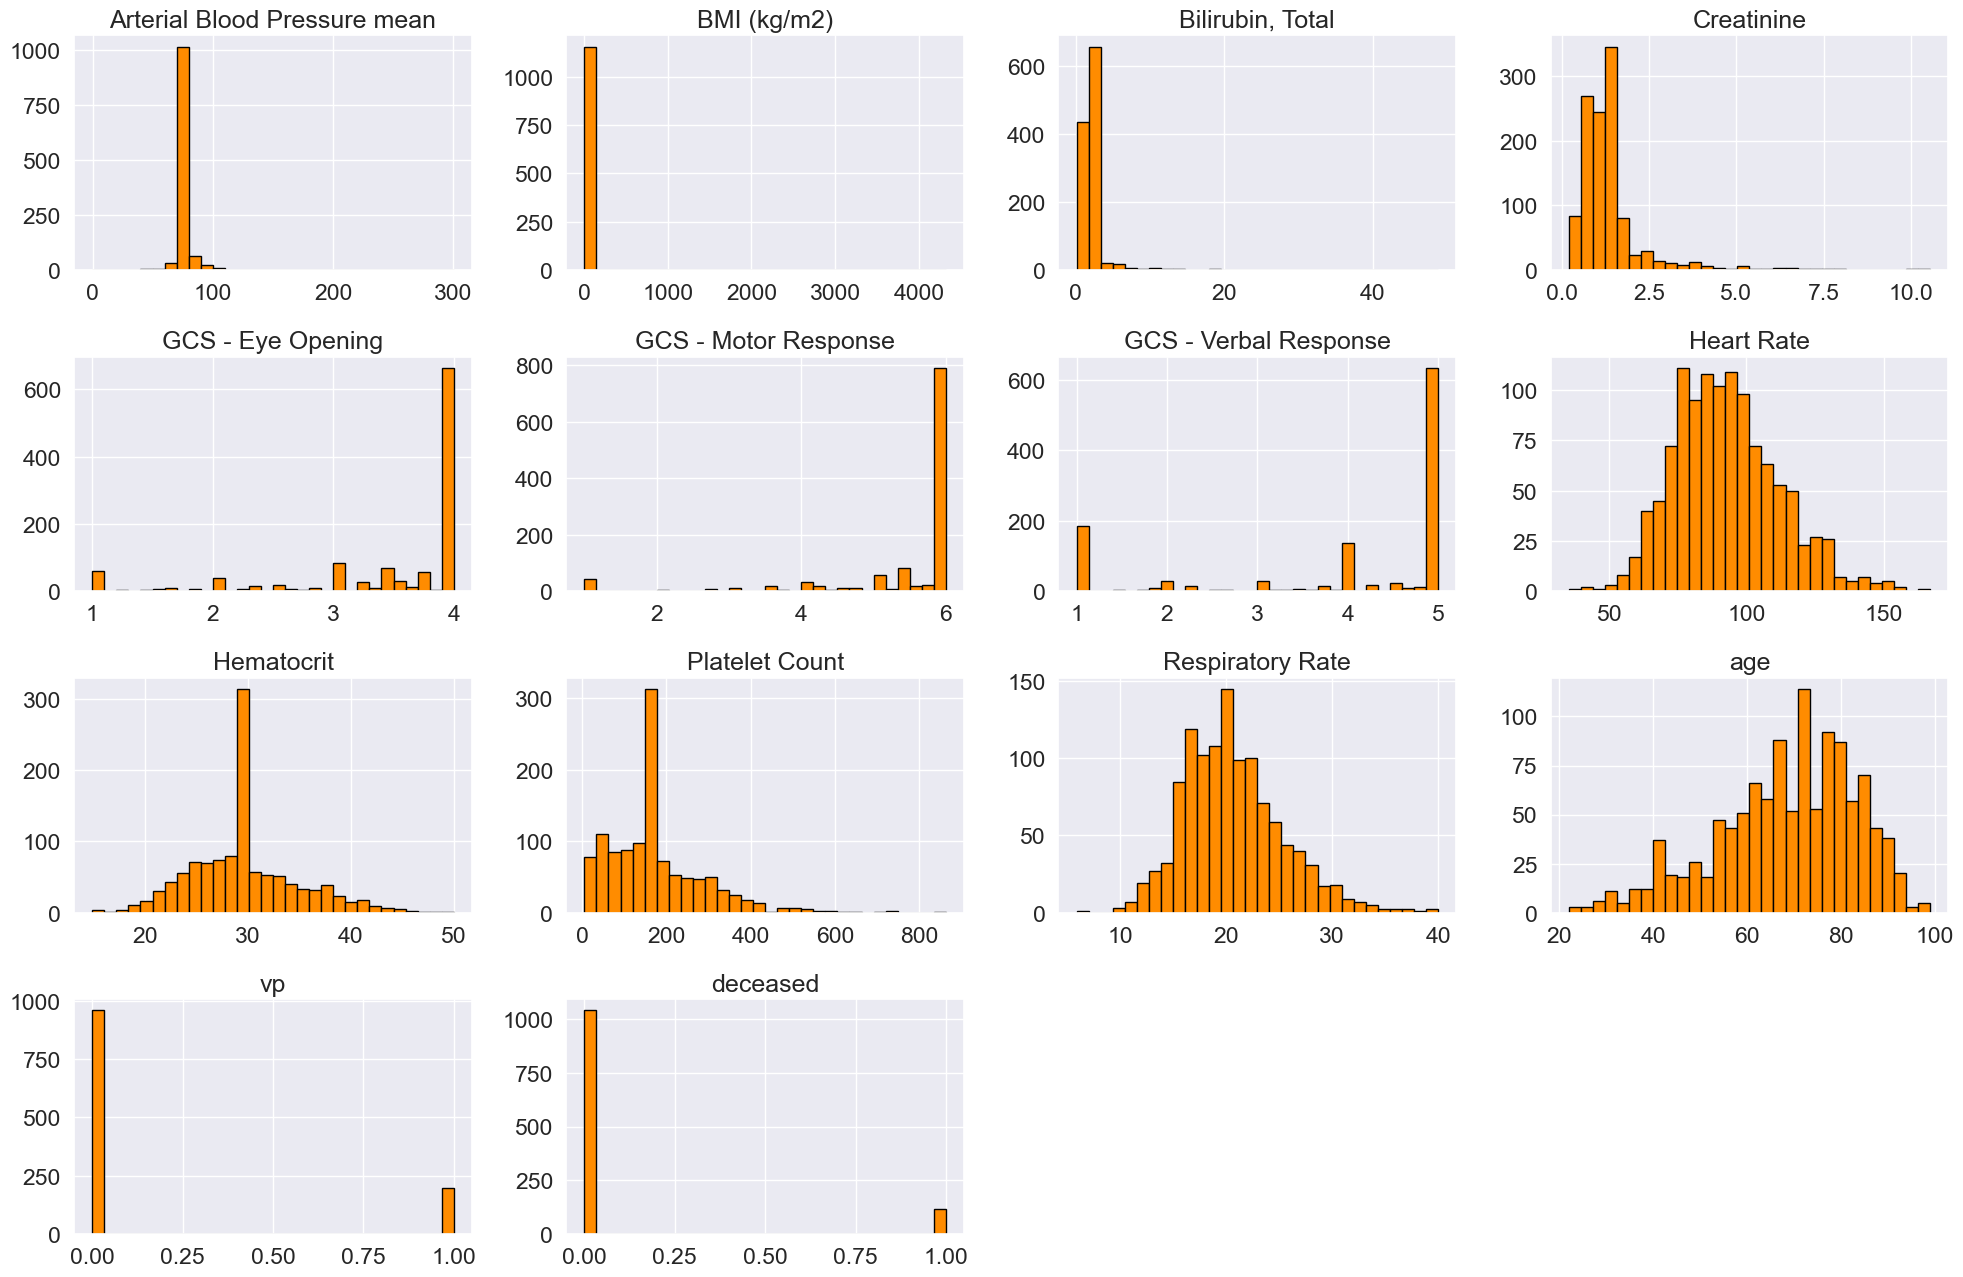

In [90]:
color = '#FF8C00'

# grid size
nrows, ncols = 5, 4  # adjust for your number of features

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

# Plot each numerical feature
for i, ax in enumerate(axes):
    if i >= len(ml.columns):
        ax.set_visible(False)  # hide unesed plots
        continue
    ax.hist(ml.iloc[:, i], bins=30, color=color, edgecolor='black')
    ax.set_title(ml.columns[i])

plt.tight_layout()
plt.show()

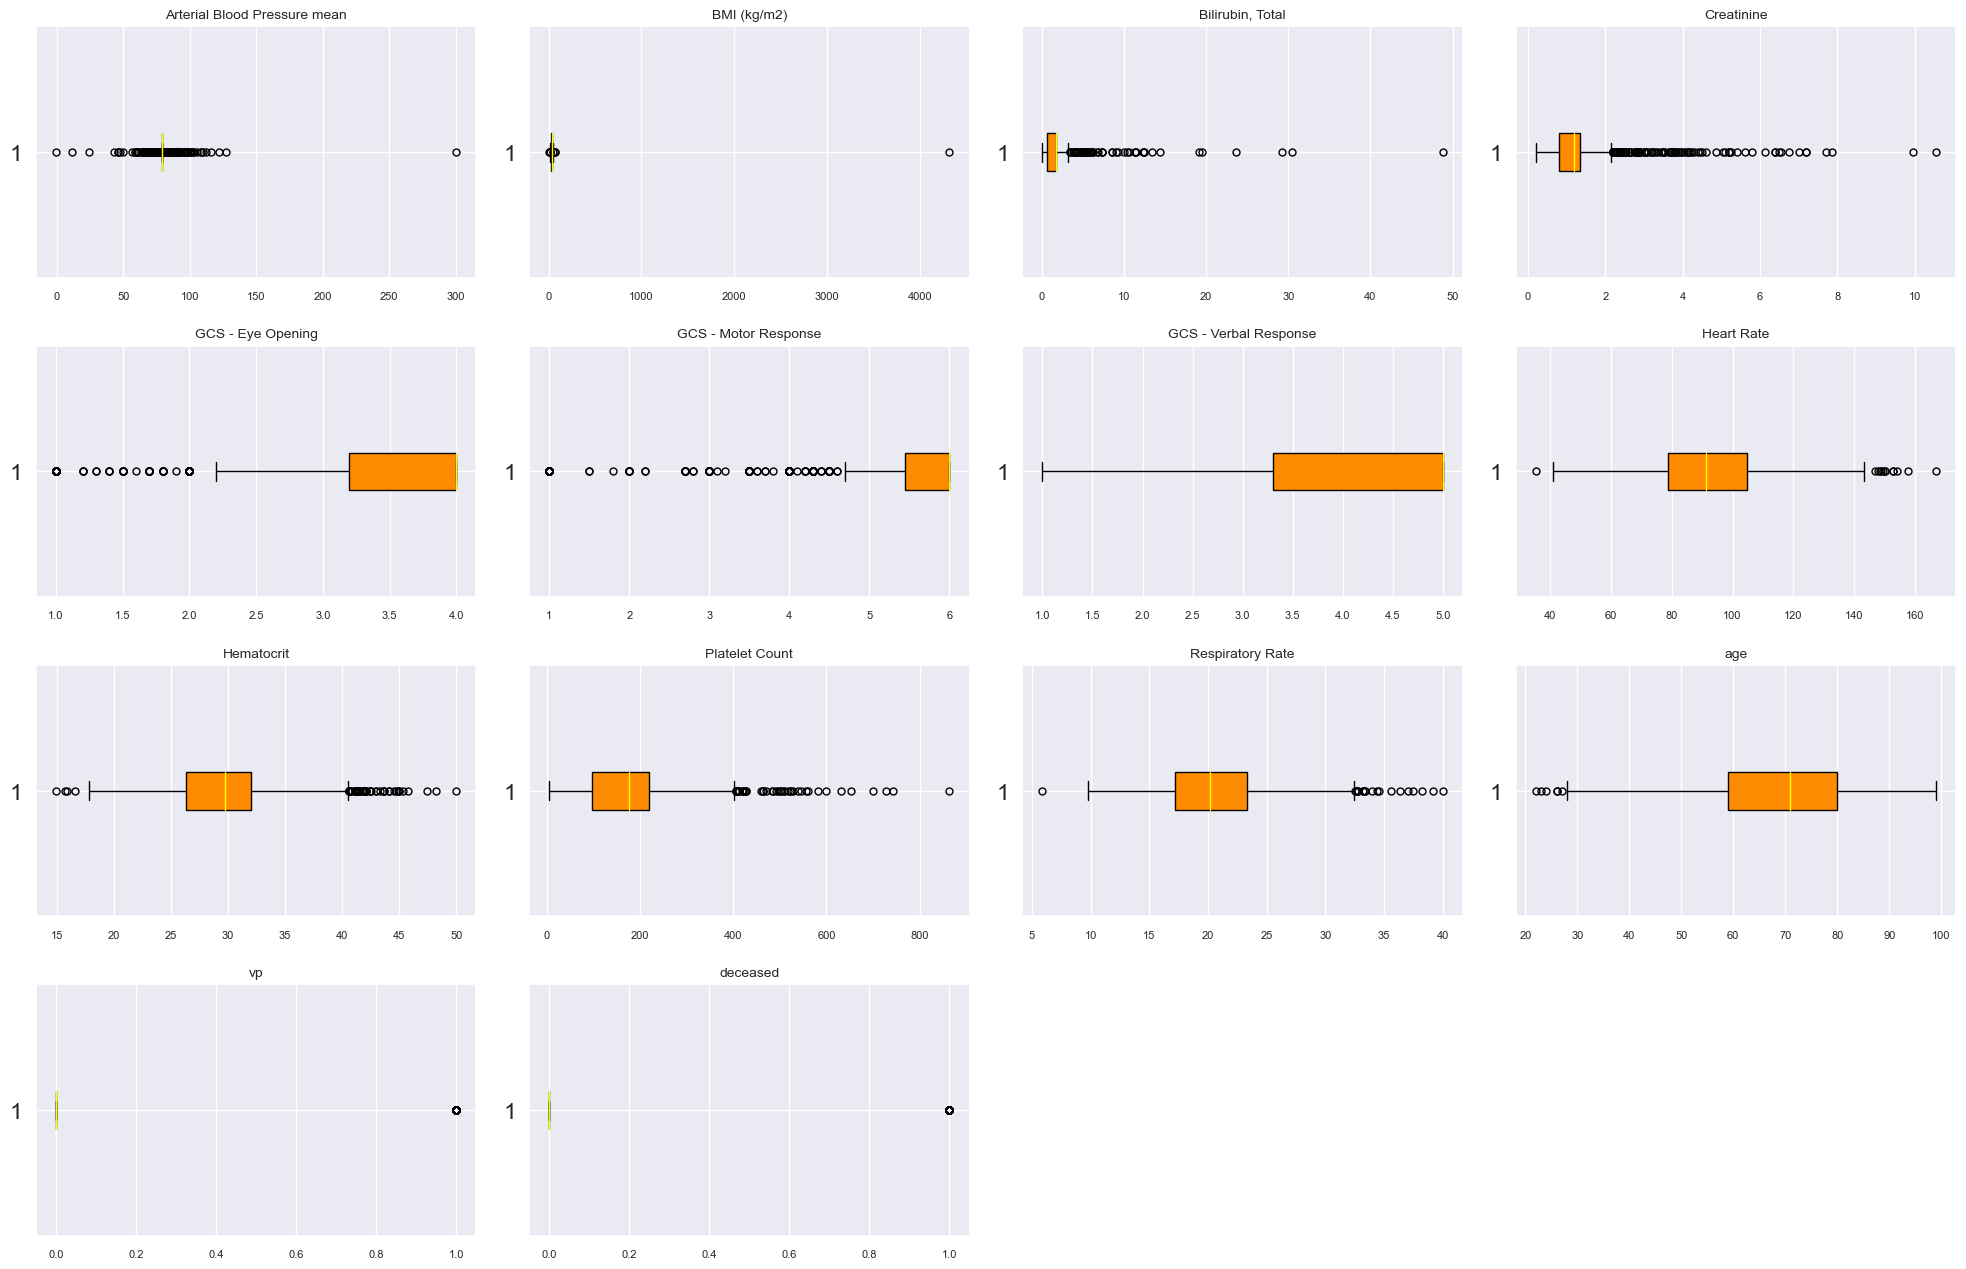

In [91]:
color = '#FF8C00'

# grid size
nrows, ncols = 5, 4 

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

for i, ax in enumerate(axes):
    if i >= len(ml.columns):
        ax.set_visible(False)
        continue
    ax.boxplot(ml.iloc[:, i].dropna(), vert=False, patch_artist=True, 
               boxprops=dict(facecolor=color, color='black'), 
               medianprops=dict(color='yellow'), whiskerprops=dict(color='black'), 
               capprops=dict(color='black'), flierprops=dict(marker='o', color='red', markersize=5))
    ax.set_title(ml.columns[i], fontsize=10)
    ax.tick_params(axis='x', labelsize=8)

plt.tight_layout()
plt.show()

In [64]:
ml.corrwith(ml['deceased']).round(2).sort_values(ascending=False)

deceased                        1.00
vp                              0.24
Respiratory Rate                0.23
Heart Rate                      0.20
Bilirubin, Total                0.13
Creatinine                      0.08
age                             0.03
BMI (kg/m2)                    -0.01
Arterial Blood Pressure mean   -0.03
Hematocrit                     -0.04
Platelet Count                 -0.08
GCS - Motor Response           -0.22
GCS - Eye Opening              -0.24
GCS - Verbal Response          -0.26
dtype: float64

In [93]:
num_corr = ml.corr().round(2)

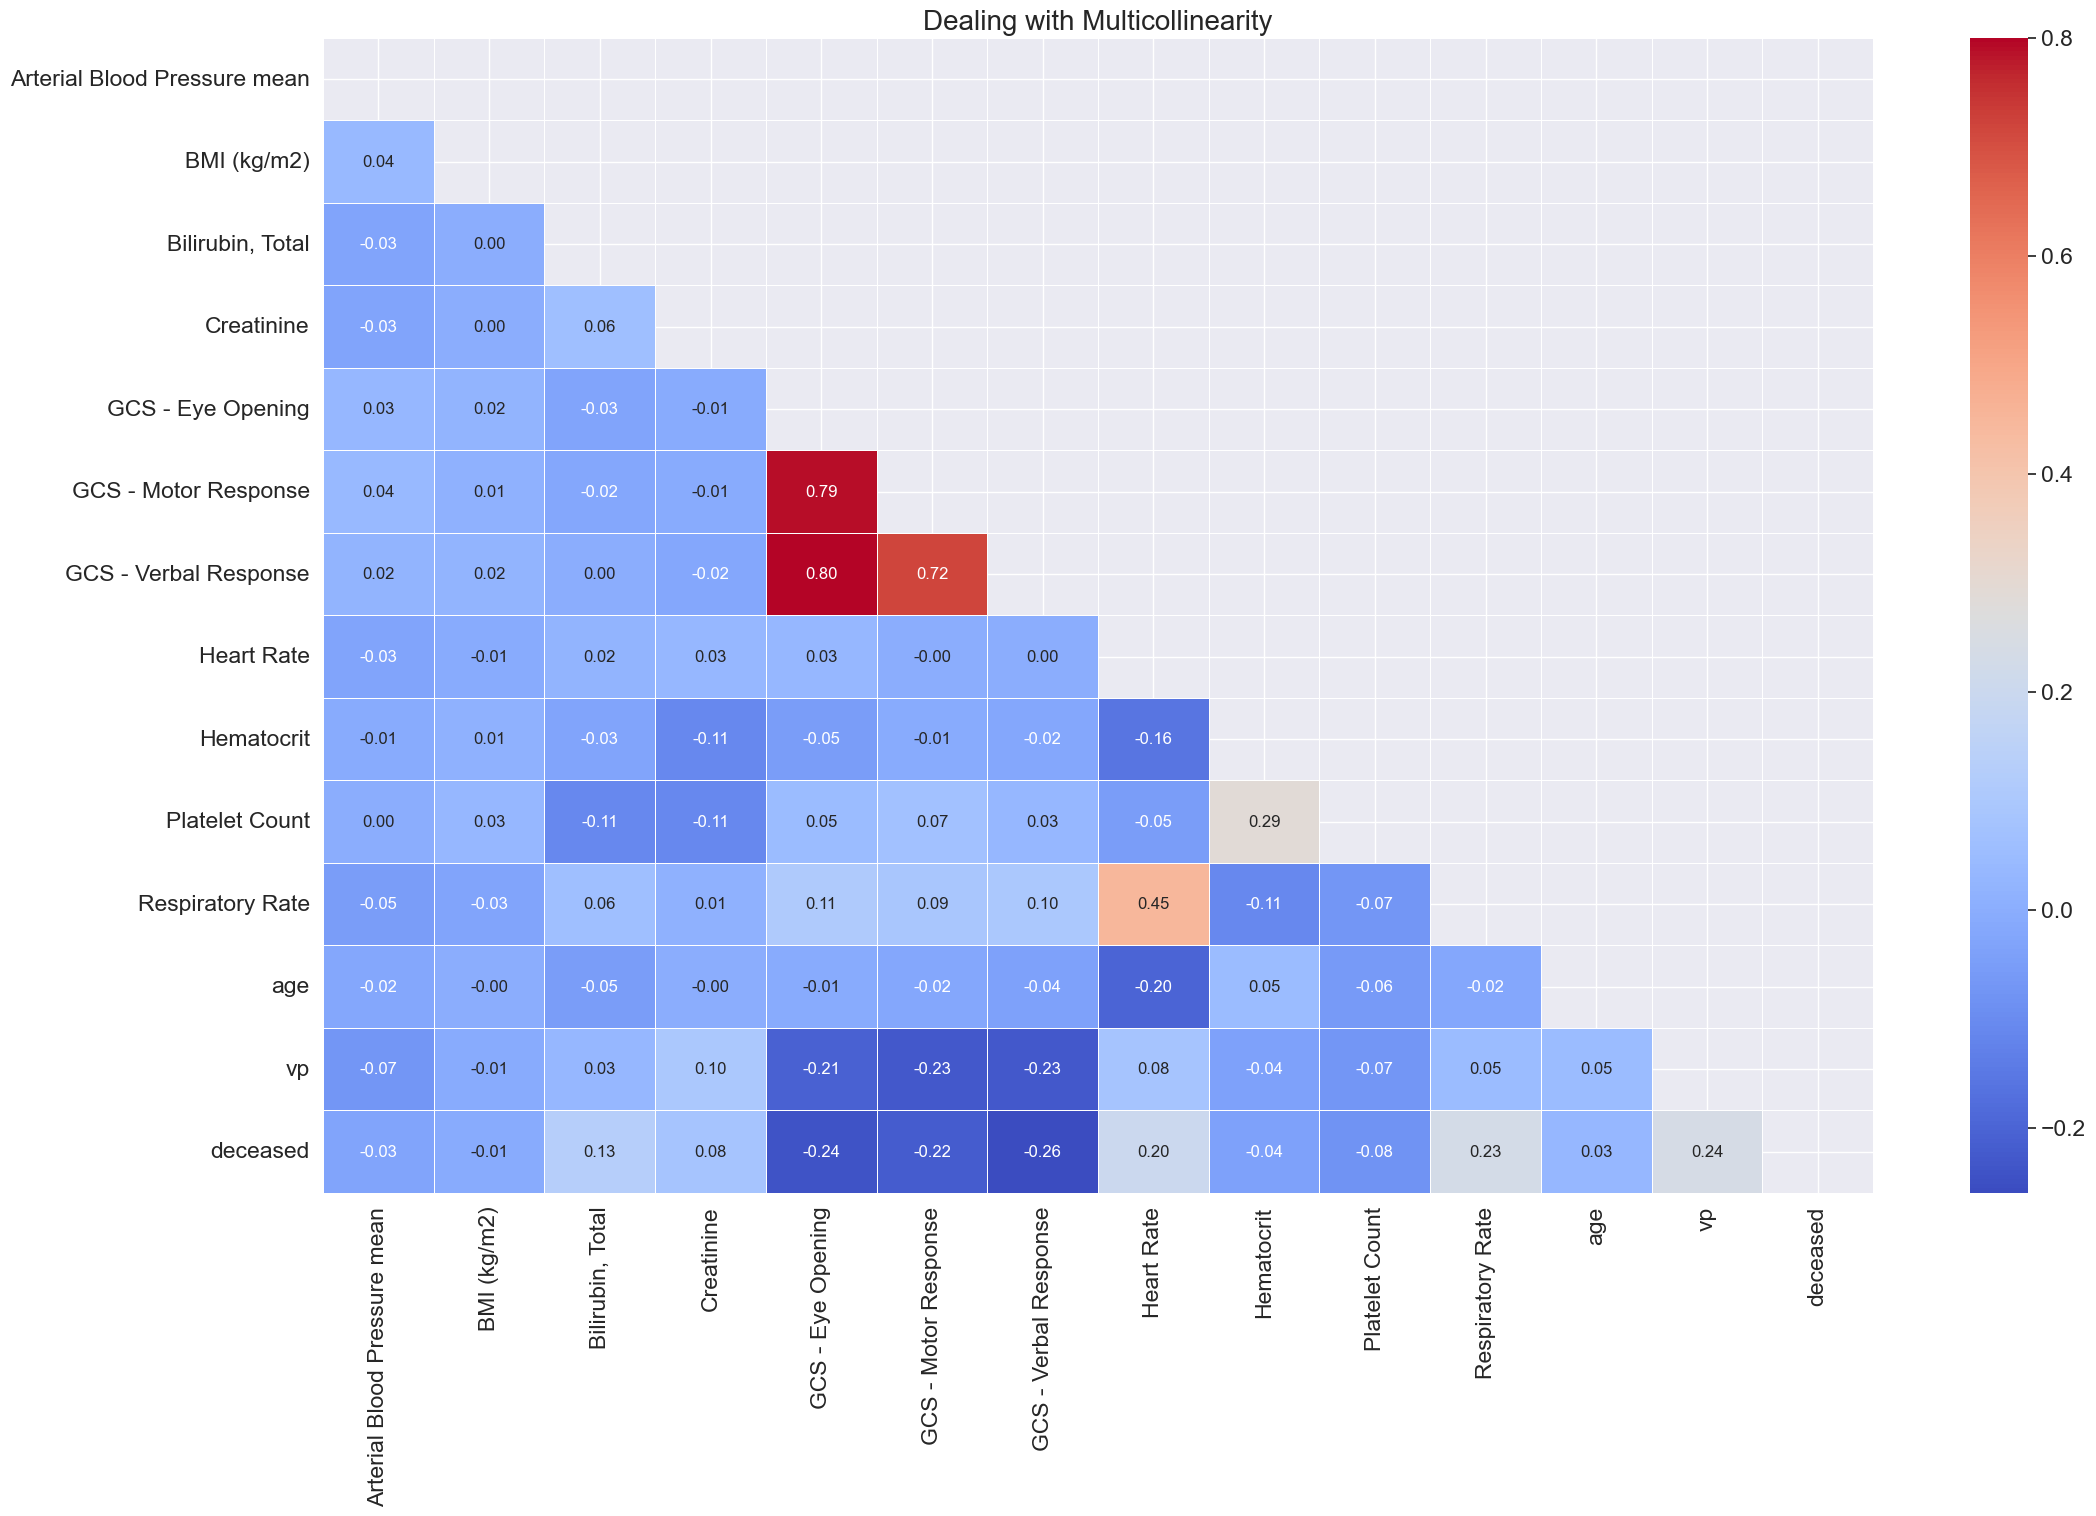

In [94]:
# Correlation Matrix-Heatmap Plot
mask = np.zeros_like(num_corr)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

f, ax = plt.subplots(figsize=(25, 15))
sns.set(font_scale=1.5) # increase font size

ax = sns.heatmap(num_corr, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="coolwarm", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Dealing with Multicollinearity", fontsize=20) # add title
plt.show()

In [65]:
X = ml.drop('deceased', axis=1)
y = ml['deceased']

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [67]:
print(f'100% of our data: {len(ml)}.')
print(f'70% for training data: {len(X_train)}.')
print(f'30% for test data: {len(X_test)}.')

100% of our data: 1157.
70% for training data: 809.
30% for test data: 348.


In [68]:
model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95       312
           1       0.54      0.19      0.29        36

    accuracy                           0.90       348
   macro avg       0.73      0.59      0.62       348
weighted avg       0.87      0.90      0.88       348



In [69]:
print("Test data accuracy: ",model.score(X_test,y_test))
print("Train data accuracy: ", model.score(X_train, y_train))

Test data accuracy:  0.8994252873563219
Train data accuracy:  0.9110012360939431


In [70]:
cm = confusion_matrix(y_test, predictions)

<Figure size 800x600 with 0 Axes>

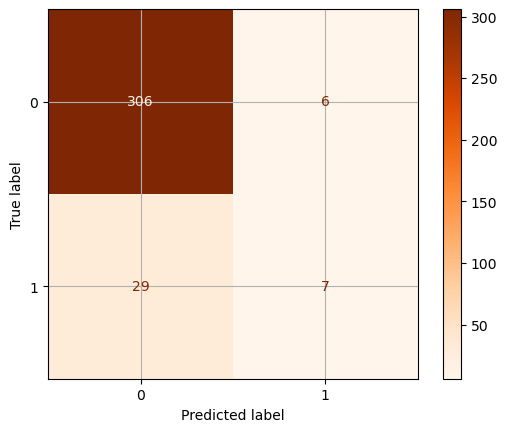

In [71]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.figure(figsize=(8, 6))
disp.plot(cmap='Oranges')  
plt.grid(True)
plt.show()

In [72]:
dt_model = DecisionTreeClassifier(max_depth=3)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)

<h3 style="color: #FF6347;">Metrics</h3>

In [73]:
print(classification_report(y_test, dt_predictions))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       312
           1       0.67      0.22      0.33        36

    accuracy                           0.91       348
   macro avg       0.79      0.60      0.64       348
weighted avg       0.89      0.91      0.89       348



In [74]:
print("Test data accuracy: ",dt_model.score(X_test,y_test))
print("Train data accuracy: ", dt_model.score(X_train, y_train))

Test data accuracy:  0.9080459770114943
Train data accuracy:  0.9208899876390606


In [75]:
dt_cm = confusion_matrix(y_test, dt_predictions)

<Figure size 800x600 with 0 Axes>

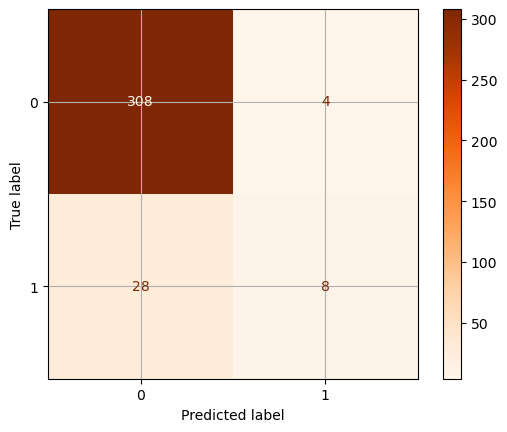

In [76]:
disp = ConfusionMatrixDisplay(confusion_matrix=dt_cm)
plt.figure(figsize=(8, 6))
disp.plot(cmap='Oranges')  
plt.grid(True)
plt.show()

In [77]:
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)

In [78]:
print(classification_report(y_test, xgb_predictions))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       312
           1       0.41      0.19      0.26        36

    accuracy                           0.89       348
   macro avg       0.66      0.58      0.60       348
weighted avg       0.86      0.89      0.87       348



In [79]:
print("Test data accuracy: ", xgb_model.score(X_test,y_test))
print("Train data accuracy: ", xgb_model.score(X_train, y_train))

Test data accuracy:  0.8879310344827587
Train data accuracy:  1.0


In [80]:
xgb_cm = confusion_matrix(y_test, xgb_predictions)

<Figure size 800x600 with 0 Axes>

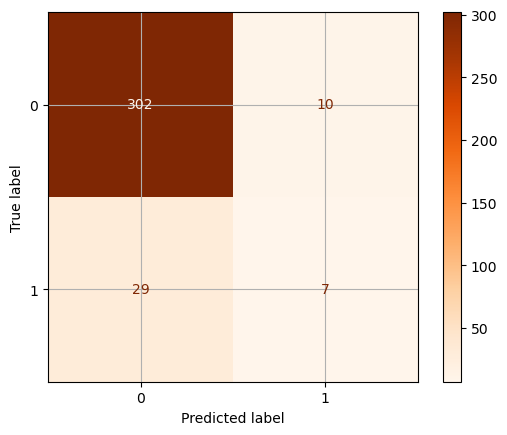

In [81]:
disp = ConfusionMatrixDisplay(confusion_matrix=xgb_cm)
plt.figure(figsize=(8, 6))
disp.plot(cmap='Oranges')  
plt.grid(True)
plt.show()